In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import regex as re

In [3]:
df_item = pd.read_csv('/workspaces/ftu_ds_comp/data/03_Item_Information_Data.csv')
df_cust = pd.read_csv('/workspaces/ftu_ds_comp/data/03_Customer_Behavior_Data.csv')
df_shelf = pd.read_csv('/workspaces/ftu_ds_comp/data/03_Shelf_Information_Data.csv')

In [67]:
des_shelf = pd.read_excel('/workspaces/ftu_ds_comp/data/02_DataDescription.xlsx',0)
des_item = pd.read_excel('/workspaces/ftu_ds_comp/data/02_DataDescription.xlsx',1)
des_cus = pd.read_excel('/workspaces/ftu_ds_comp/data/02_DataDescription.xlsx',2)
des_join= pd.concat([des_item,pd.DataFrame({np.nan: np.nan*des_item.shape[1]},index=[0]),des_cus,pd.DataFrame({np.nan: np.nan*des_item.shape[1]},index=[0]), des_shelf ], axis=0).to_csv('description.txt', sep='\t', index=False)

In [5]:
print(df_item.shape, df_item.columns.to_list())
print(df_cust.shape,df_cust.columns.to_list())
print(df_shelf.shape,df_shelf.columns.to_list())

(134, 12) ['Shelf ID', 'Item ID', 'Name', 'Origin', 'Location', 'Weight (g)', 'Price', 'NSX', 'HSD', 'Marketing strategy', 'Discount ', 'Rate']
(15394, 18) ['Shelf ID', 'Person ID', 'Timestamp', 'Age', 'Gender', 'Height', 'Weight', 'Married status', 'Moving speed (m/s)', 'Item ID', 'Looking at item (s)', 'Holding the item (s)', 'Holding the bag', 'Picking up item', 'Returning item', 'Putting item into bag', 'Taking item out of bag', 'Putting item into bag in the 2nd time']
(8, 9) ['Shelf ID', 'Description', 'Location_x (center)', 'Location_y (center)', 'Width', 'Height', 'Length', 'Number of items', 'Shape']


____
## Data cleaning 

### 1. df_item 

- 134 rows 
- 12 columms


In [6]:
df_item.head(5)

,Shelf ID,Item ID,Name,Origin,Location,Weight (g),Price,NSX,HSD,Marketing strategy,Discount,Rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,"17,500 ₫",2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,"48,000 ₫",2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,"40,000 ₫",2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,"13,400 ₫",2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,"17,000 ₫",2023-10-30,2024-04-16,True,10,4


In [7]:
print(df_item.describe(), df_item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shelf ID            134 non-null    int64  
 1   Item ID             134 non-null    int64  
 2   Name                134 non-null    object 
 3   Origin              134 non-null    object 
 4   Location            134 non-null    object 
 5   Weight (g)          110 non-null    float64
 6   Price               134 non-null    object 
 7   NSX                 100 non-null    object 
 8   HSD                 100 non-null    object 
 9   Marketing strategy  134 non-null    bool   
 10  Discount            134 non-null    int64  
 11  Rate                134 non-null    int64  
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 11.8+ KB
         Shelf ID     Item ID   Weight (g)   Discount         Rate
count  134.000000  134.000000   110.000000  134.000000  134.000000
mea

#### TODO:
- convert NSX, HSD -> datetime
- clean Price to int + rename col to price_vnd
- change all name to camel case & lowercase 

In [8]:
df_item['NSX'] = pd.to_datetime(df_item['NSX'], format='%Y-%m-%d', errors='ignore') # covert to date_time  
df_item['HSD'] = pd.to_datetime(df_item['HSD'], format='%Y-%m-%d', errors='ignore') # covert to date_time

/tmp/ipykernel_5304/1590734509.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_item['NSX'] = pd.to_datetime(df_item['NSX'], format='%Y-%m-%d', errors='ignore') # covert to date_time
/tmp/ipykernel_5304/1590734509.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_item['HSD'] = pd.to_datetime(df_item['HSD'], format='%Y-%m-%d', errors='ignore') # covert to date_time


In [9]:
df_item.loc[:,'Price'] = df_item.Price.replace(regex=r'\D+', value='') # clean to int char
df_item.rename(columns={'Price': 'Price_vnd'}, inplace=True)
df_item['Price_vnd'] = pd.to_numeric(df_item['Price_vnd'],errors='coerce') # convert to numeric

In [10]:
df_item_col = df_item.columns.to_list()
df_item_col_new={col:re.sub(' ','_', col.strip()).lower() for col in df_item_col}
df_item.rename(columns=df_item_col_new,inplace=True)

In [11]:
df_item.head(5)

,shelf_id,item_id,name,origin,location,weight_(g),price_vnd,nsx,hsd,marketing_strategy,discount,rate
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,17500,2023-11-14,2024-10-17,False,10,4
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,48000,2023-10-07,2024-09-16,False,0,3
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,40000,2024-06-02,2026-06-02,False,0,3
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,13400,2024-05-02,2026-05-02,False,0,3
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,17000,2023-10-30,2024-04-16,True,10,4


In [12]:
print(df_item.describe(), df_item.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   shelf_id            134 non-null    int64         
 1   item_id             134 non-null    int64         
 2   name                134 non-null    object        
 3   origin              134 non-null    object        
 4   location            134 non-null    object        
 5   weight_(g)          110 non-null    float64       
 6   price_vnd           134 non-null    int64         
 7   nsx                 100 non-null    datetime64[ns]
 8   hsd                 100 non-null    datetime64[ns]
 9   marketing_strategy  134 non-null    bool          
 10  discount            134 non-null    int64         
 11  rate                134 non-null    int64         
dtypes: bool(1), datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 11.8+ KB
         shelf_id   

#### EDA of df_item:
> 34 NSX , 34 HSD nulls, 24 weight_(g) nulls 
- fill in strategy: 
- - NSX & HSD: leave as is
- - weight: leave as is 

In [13]:
df_item['si_id']= df_item['shelf_id'].astype(str) + df_item['item_id'].astype(str)
df_item.nunique().to_dict()

{'shelf_id': 8,
 'item_id': 25,
 'name': 134,
 'origin': 11,
 'location': 3,
 'weight_(g)': 58,
 'price_vnd': 109,
 'nsx': 82,
 'hsd': 90,
 'marketing_strategy': 2,
 'discount': 9,
 'rate': 3,
 'si_id': 134}

In [59]:
df_item

,shelf_id,item_id,name,origin,location,weight_(g),price_vnd,nsx,hsd,marketing_strategy,discount,rate,si_id
0,0,0,Bánh Oreo,Vietnam,Cao,120.0,17500,2023-11-14,2024-10-17,False,10,4,00
1,0,1,Bánh Chocopie,Vietnam,Cao,396.0,48000,2023-10-07,2024-09-16,False,0,3,01
2,0,2,Kẹo cao su Cool Air Fresh,Vietnam,Trung bình,40.0,40000,2024-06-02,2026-06-02,False,0,3,02
3,0,3,Bánh mỳ chà bông Kinh đô,Vietnam,Trung bình,80.0,13400,2024-05-02,2026-05-02,False,0,3,03
4,0,4,Bánh trứng Custard,Thái Lan,Trung bình,46.0,17000,2023-10-30,2024-04-16,True,10,4,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,7,11,Pizza kitkool,Vietnam,Thấp,140.0,33000,2024-04-16,2024-06-10,False,0,4,711
130,7,12,Mý ý SG Food,Vietnam,Thấp,250.0,27000,2024-02-05,2024-09-03,False,0,4,712
131,7,13,Thanh cua Akira,Nhật Bản,Thấp,200.0,58500,2023-10-16,2023-12-19,False,0,4,713
132,7,14,Nước lẩu Barona,Vietnam,Thấp,180.0,32000,2023-12-02,2024-03-02,False,0,4,714


### 2. df_cust 
- 15394 rows 
- 18 columms


In [14]:
df_cust.head(5)

,Shelf ID,Person ID,Timestamp,Age,Gender,Height,Weight,Married status,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s),Holding the bag,Picking up item,Returning item,Putting item into bag,Taking item out of bag,Putting item into bag in the 2nd time
0,4,1,1720260000,52,Female,162,41,Married,0.19,16,27,36,True,True,False,False,False,True
1,4,1,1720260120,52,Female,162,41,Married,0.49,5,22,17,True,True,False,True,True,True
2,4,1,1720260300,52,Female,162,41,Married,0.36,4,25,39,True,True,True,True,True,False
3,4,1,1720260360,52,Female,162,41,Married,0.64,8,21,35,True,True,True,False,False,False
4,4,1,1720260480,52,Female,162,41,Married,0.13,6,27,16,True,True,False,False,False,True


In [15]:
df_cust.describe()

,Shelf ID,Person ID,Timestamp,Age,Height,Weight,Moving speed (m/s),Item ID,Looking at item (s),Holding the item (s)
count,15394.000000,15394.000000,1.539400e+04,15394.000000,15394.000000,15394.000000,15394.000000,15394.000000,15394.000000,15394.000000
mean,3.316942,733.690984,1.720211e+09,46.198064,164.719826,60.015720,0.803467,7.563206,28.699948,27.087502
std,2.580487,429.865481,1.567575e+05,16.991954,9.880132,14.068385,0.403269,5.190824,12.596675,10.249892
min,0.000000,1.000000,1.719828e+09,18.000000,147.000000,40.000000,0.100000,0.000000,0.000000,0.000000
25%,1.000000,360.000000,1.720109e+09,31.000000,156.000000,48.000000,0.460000,3.000000,20.000000,20.000000
50%,3.000000,718.000000,1.720261e+09,45.000000,166.000000,57.000000,0.810000,7.000000,27.000000,27.000000
75%,6.000000,1105.000000,1.720326e+09,62.000000,174.000000,71.000000,1.150000,11.000000,35.000000,34.000000
max,7.000000,1500.000000,1.720459e+09,75.000000,179.000000,89.000000,1.500000,24.000000,69.000000,59.000000


In [16]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Shelf ID                               15394 non-null  int64  
 1   Person ID                              15394 non-null  int64  
 2   Timestamp                              15394 non-null  int64  
 3   Age                                    15394 non-null  int64  
 4   Gender                                 15394 non-null  object 
 5   Height                                 15394 non-null  int64  
 6   Weight                                 15394 non-null  int64  
 7   Married status                         15394 non-null  object 
 8   Moving speed (m/s)                     15394 non-null  float64
 9   Item ID                                15394 non-null  int64  
 10  Looking at item (s)                    15394 non-null  int64  
 11  Ho

### TODO:
- change all name to camel case & lowercase 
- null of 3 columns:

    15  Putting item into bag                  14056 non-null  object 

    16  Taking item out of bag                 13452 non-null  object 

    17  Putting item into bag in the 2nd time  12723 non-null  object  
- clean Timestamp to datetime[ns] (currently Epoch time(?))
- create pk si_id
- hot-one enconding gender , married status

In [17]:
df_cust_col = df_cust.columns.to_list()
df_cust_col_new={col:re.sub(' ','_', col.strip()).lower() for col in df_cust_col}
df_cust.rename(columns=df_cust_col_new,inplace=True)
df_cust['si_id']= df_cust['shelf_id'].astype(str) + df_cust['item_id'].astype(str)


In [18]:
df_cust.nunique()

shelf_id                                    8
person_id                                1500
timestamp                                6491
age                                        58
gender                                      2
height                                     32
weight                                     50
married_status                              2
moving_speed_(m/s)                        141
item_id                                    25
looking_at_item_(s)                        60
holding_the_item_(s)                       50
holding_the_bag                             2
picking_up_item                             2
returning_item                              2
putting_item_into_bag                       2
taking_item_out_of_bag                      2
putting_item_into_bag_in_the_2nd_time       2
si_id                                     134
dtype: int64

In [19]:
print(df_cust.isnull().sum()[df_cust.isnull().sum() > 0].to_dict()) # 5951 / 5081 

{'putting_item_into_bag': 1338, 'taking_item_out_of_bag': 1942, 'putting_item_into_bag_in_the_2nd_time': 2671}


In [20]:
df_cust['timestamp']=pd.to_datetime(df_cust['timestamp'], unit='s')
df_cust['date'] = df_cust['timestamp'].dt.date  # YYYY-MM-DD
df_cust['time'] = df_cust['timestamp'].dt.time ## HH:MM:SS
df_cust.sort_values(by='timestamp',ascending=False).head(5) # latest 2024-07-08 17:21:00
df_cust.sort_values(by='timestamp',ascending=True).head(5) # earliest 2024-07-01 10:00:00

,shelf_id,person_id,timestamp,age,gender,height,weight,married_status,moving_speed_(m/s),item_id,...,holding_the_item_(s),holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,si_id,date,time
8808,6,827,2024-07-01 10:00:00,30,Female,149,45,Single,0.17,0,...,5,False,True,True,True,NaN,True,60,2024-07-01,10:00:00
8809,6,827,2024-07-01 10:03:00,30,Female,149,45,Single,1.31,15,...,3,False,True,False,False,False,True,615,2024-07-01,10:03:00
8810,4,828,2024-07-01 10:03:00,42,Male,176,76,Married,0.80,10,...,17,True,True,False,True,False,False,410,2024-07-01,10:03:00
8811,4,828,2024-07-01 10:05:00,42,Male,176,76,Married,0.34,14,...,27,True,True,False,True,True,False,414,2024-07-01,10:05:00
8812,4,828,2024-07-01 10:09:00,42,Male,176,76,Married,1.38,2,...,37,True,True,True,True,False,True,42,2024-07-01,10:09:00


In [21]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   shelf_id                               15394 non-null  int64         
 1   person_id                              15394 non-null  int64         
 2   timestamp                              15394 non-null  datetime64[ns]
 3   age                                    15394 non-null  int64         
 4   gender                                 15394 non-null  object        
 5   height                                 15394 non-null  int64         
 6   weight                                 15394 non-null  int64         
 7   married_status                         15394 non-null  object        
 8   moving_speed_(m/s)                     15394 non-null  float64       
 9   item_id                                15394 non-null  int64 

### 2.1 Create interaction & interest ( `i_i` ) df

In [22]:
interact= df_cust[['si_id','shelf_id','item_id','person_id','timestamp', 'date', 'time', 'holding_the_bag','picking_up_item','returning_item'	,'putting_item_into_bag'	,'taking_item_out_of_bag'	,'putting_item_into_bag_in_the_2nd_time']]
interest=pd.concat([df_cust['holding_the_item_(s)'] >0, df_cust['looking_at_item_(s)'] >0],axis=1)
i_i=pd.concat([interact,interest],axis=1)
i_i

,si_id,shelf_id,item_id,person_id,timestamp,date,time,holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,holding_the_item_(s),looking_at_item_(s)
0,416,4,16,1,2024-07-06 10:00:00,2024-07-06,10:00:00,True,True,False,False,False,True,True,True
1,45,4,5,1,2024-07-06 10:02:00,2024-07-06,10:02:00,True,True,False,True,True,True,True,True
2,44,4,4,1,2024-07-06 10:05:00,2024-07-06,10:05:00,True,True,True,True,True,False,True,True
3,48,4,8,1,2024-07-06 10:06:00,2024-07-06,10:06:00,True,True,True,False,False,False,True,True
4,46,4,6,1,2024-07-06 10:08:00,2024-07-06,10:08:00,True,True,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,24,2,4,1500,2024-07-05 03:49:00,2024-07-05,03:49:00,False,True,False,True,True,True,True,True
15390,33,3,3,1500,2024-07-05 03:54:00,2024-07-05,03:54:00,False,True,False,True,True,True,True,True
15391,321,3,21,1500,2024-07-05 03:56:00,2024-07-05,03:56:00,False,True,False,False,True,False,True,True
15392,313,3,13,1500,2024-07-05 03:58:00,2024-07-05,03:58:00,False,True,False,False,True,True,True,True


#### null of i_i 

In [23]:
null = pd.concat([i_i.loc[i_i['putting_item_into_bag'].isnull(), :], \
    i_i.loc[i_i['taking_item_out_of_bag'].isnull(), :], \
        i_i.loc[i_i['taking_item_out_of_bag'].isnull(), :], \
            i_i.loc[i_i['putting_item_into_bag_in_the_2nd_time'].isnull(), :]], axis=0).drop_duplicates()   
null.head(5)

,si_id,shelf_id,item_id,person_id,timestamp,date,time,holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,holding_the_item_(s),looking_at_item_(s)
16,012,0,12,2,2024-07-06 10:41:00,2024-07-06,10:41:00,True,True,True,NaN,True,True,True,True
17,06,0,6,2,2024-07-06 10:45:00,2024-07-06,10:45:00,True,True,True,NaN,NaN,NaN,True,True
19,19,1,9,3,2024-07-06 10:26:00,2024-07-06,10:26:00,True,True,True,NaN,True,True,True,True
34,715,7,15,5,2024-07-06 10:46:00,2024-07-06,10:46:00,True,True,True,NaN,False,True,True,True
35,714,7,14,5,2024-07-06 10:51:00,2024-07-06,10:51:00,True,True,True,NaN,True,True,True,True


In [24]:
null[(null['putting_item_into_bag'].isnull()) & (null['putting_item_into_bag_in_the_2nd_time'].isnull()) &(null['returning_item']==False) ]

,si_id,shelf_id,item_id,person_id,timestamp,date,time,holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,holding_the_item_(s),looking_at_item_(s)



null[(null['putting_item_into_bag'].isnull()) & (null['putting_item_into_bag_in_the_2nd_time'].isnull()) &(null['returning_item']==False) ]
0 rows
#### CONFIRM: 1 of the 2 put columns with null will always have a value when 'returning_item' == False indicating buy

In [25]:
i_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   si_id                                  15394 non-null  object        
 1   shelf_id                               15394 non-null  int64         
 2   item_id                                15394 non-null  int64         
 3   person_id                              15394 non-null  int64         
 4   timestamp                              15394 non-null  datetime64[ns]
 5   date                                   15394 non-null  object        
 6   time                                   15394 non-null  object        
 7   holding_the_bag                        15394 non-null  bool          
 8   picking_up_item                        15394 non-null  bool          
 9   returning_item                         15394 non-null  bool  

In [26]:
i_i[i_i.duplicated(subset=['si_id','date','time', 'person_id'])]
# each observation is of 1 customer - 1 product&shelf - @ 1 time-date stamp 

,si_id,shelf_id,item_id,person_id,timestamp,date,time,holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,holding_the_item_(s),looking_at_item_(s)


logic of buy = Mặt hàng được xem là “được mua” khi mặt hàng đấy được bỏ vào giỏ hàng và không được lấy ra \
“looking at item” → “picking up item” → “holding the item” → “put item into bag” (disregard put_item_into_the_bag_the_2nd_time == False/Nan)



##### filtering i_i for buy == true (definite True condition <->  Nan = not statisfying condition)
1. Not returning items 
2. Not taking items out of the bag\
    Since taking_item_out_of_bag has Nan (representing missing data) -> filtering based on taking_item_out_of_bag == False  
3. Since putting_item_into_bag and putting_item_into_bag_the_2nd_time has Nan (representing missing data) -> filtering based on whether the 2nd time value is True and if not true then the 1st value and both not returning and not taking must be false 
    (['putting_item_into_bag_in_the_2nd_time'] == True) # all putting_item_into_bag_in_the_2nd_time that is True takes precedent over putting_item_into_bag and taking_item_out_of_bag bc it indicates the lattermost action \
    or \
    (['putting_item_into_bag_in_the_2nd_time'] != True) & (['putting_item_into_bag'] == False)  # Include putting_item_into_bag_in_the_2nd_time NaN as "no action"

4. Review the distinct combinations of the 4 column returning_item	putting_item_into_bag	taking_item_out_of_bag	putting_item_into_bag_in_the_2nd_time	to determine buy after filtering == True case


In [27]:
# buy=i_i[i_i['returning_item']==False] # NO RETURN ACTION: 8698 out of 15394
# buy=buy[buy['taking_item_out_of_bag'] != True] # NO TAKING_OUT ACTION 5399 out of 8698 (630 taking_out na)
# # buy = buy[
# #     ((buy['putting_item_into_bag'] == True) | (buy['putting_item_into_bag'].isna())) &  # Include NaN as "no action"
# #     ((buy['putting_item_into_bag_in_the_2nd_time'] == True) | (buy['putting_item_into_bag_in_the_2nd_time'].isna()))  # Include NaN as "no action"
# # ]
# buy=buy[
#     (buy['putting_item_into_bag'] != False ) & (buy['putting_item_into_bag_in_the_2nd_time'] != False ) ] # NO 2 FALSE PUT ACTION 2045 out of 5399

# buy.drop_duplicates(subset=['putting_item_into_bag', 'taking_item_out_of_bag','putting_item_into_bag_in_the_2nd_time']) 

#### DEFINED BUY LOGIC:

In [28]:
buy=i_i[(
  (i_i['returning_item']==False) &
  (i_i['taking_item_out_of_bag'] == False) & 
  (
    (
      (i_i['putting_item_into_bag_in_the_2nd_time'] == True) # all putting_item_into_bag_in_the_2nd_time that is True takes precedent over putting_item_into_bag and taking_item_out_of_bag bc it indicates the lattermost action 
    ) | 
    (
      (i_i['putting_item_into_bag_in_the_2nd_time'] != True) & # putting_item_into_bag_in_the_2nd_time =[False & Nan NaN as "no action"]
      (i_i['putting_item_into_bag'] ==True) & (i_i['taking_item_out_of_bag'] == False)
      ) 
  ) 
 )]
buy.drop_duplicates(subset=['returning_item','putting_item_into_bag', 'taking_item_out_of_bag','putting_item_into_bag_in_the_2nd_time']) 

,si_id,shelf_id,item_id,person_id,timestamp,date,time,holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,holding_the_item_(s),looking_at_item_(s)
0,416,4,16,1,2024-07-06 10:00:00,2024-07-06,10:00:00,True,True,False,False,False,True,True,True
5,45,4,5,1,2024-07-06 10:12:00,2024-07-06,10:12:00,True,True,False,True,False,True,True,True
21,27,2,7,3,2024-07-06 10:31:00,2024-07-06,10:31:00,True,True,False,True,False,NaN,True,True
23,27,2,7,3,2024-07-06 10:37:00,2024-07-06,10:37:00,True,True,False,True,False,False,True,True


**note**:  
all the rows with (i_i['putting_item_into_bag_in_the_2nd_time'] != True) & (i_i['putting_item_into_bag'] != False) have the i_i['taking_item_out_of_bag'] as False 


In [29]:
i_i['is_buy'] = (
    (i_i['returning_item'] == False) &
    (i_i['taking_item_out_of_bag'] == False) & 
    (
        (i_i['putting_item_into_bag_in_the_2nd_time'] == True) | 
        (
            (i_i['putting_item_into_bag_in_the_2nd_time'] != True) & 
            (i_i['putting_item_into_bag'] ==True) & (i_i['taking_item_out_of_bag'] == False)
        )
    )
).astype(bool)

In [30]:
i_i['dow'] =pd.to_datetime(i_i['date']).dt.day_name() 
i_i

,si_id,shelf_id,item_id,person_id,timestamp,date,time,holding_the_bag,picking_up_item,returning_item,putting_item_into_bag,taking_item_out_of_bag,putting_item_into_bag_in_the_2nd_time,holding_the_item_(s),looking_at_item_(s),is_buy,dow
0,416,4,16,1,2024-07-06 10:00:00,2024-07-06,10:00:00,True,True,False,False,False,True,True,True,True,Saturday
1,45,4,5,1,2024-07-06 10:02:00,2024-07-06,10:02:00,True,True,False,True,True,True,True,True,False,Saturday
2,44,4,4,1,2024-07-06 10:05:00,2024-07-06,10:05:00,True,True,True,True,True,False,True,True,False,Saturday
3,48,4,8,1,2024-07-06 10:06:00,2024-07-06,10:06:00,True,True,True,False,False,False,True,True,False,Saturday
4,46,4,6,1,2024-07-06 10:08:00,2024-07-06,10:08:00,True,True,False,False,False,True,True,True,True,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,24,2,4,1500,2024-07-05 03:49:00,2024-07-05,03:49:00,False,True,False,True,True,True,True,True,False,Friday
15390,33,3,3,1500,2024-07-05 03:54:00,2024-07-05,03:54:00,False,True,False,True,True,True,True,True,False,Friday
15391,321,3,21,1500,2024-07-05 03:56:00,2024-07-05,03:56:00,False,True,False,False,True,False,True,True,False,Friday
15392,313,3,13,1500,2024-07-05 03:58:00,2024-07-05,03:58:00,False,True,False,False,True,True,True,True,False,Friday


### 2.2 Create demographic df 
- create 'age_group' col


In [31]:
demo = df_cust[['person_id','si_id','timestamp', 'age','height','weight','married_status', 'moving_speed_(m/s)']]

In [32]:
bins = [18, 31, 61, demo['age'].max() + 1]
labels = [1, 2, 3]
demo['age_group'] = pd.cut(demo.age, bins=bins, labels=labels, right=False)

/tmp/ipykernel_5304/552342526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['age_group'] = pd.cut(demo.age, bins=bins, labels=labels, right=False)


In [33]:
demo.head()

,person_id,si_id,timestamp,age,height,weight,married_status,moving_speed_(m/s),age_group
0,1,416,2024-07-06 10:00:00,52,162,41,Married,0.19,2
1,1,45,2024-07-06 10:02:00,52,162,41,Married,0.49,2
2,1,44,2024-07-06 10:05:00,52,162,41,Married,0.36,2
3,1,48,2024-07-06 10:06:00,52,162,41,Married,0.64,2
4,1,46,2024-07-06 10:08:00,52,162,41,Married,0.13,2


## 3. df_shelf
- 8 rows 
- 9 cols

TODO: 
- plot map for q11
- rename column to camel case

In [34]:
df_shelf.head()

,Shelf ID,Description,Location_x (center),Location_y (center),Width,Height,Length,Number of items,Shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng


In [35]:
print(df_shelf.describe(), df_shelf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Shelf ID             8 non-null      int64 
 1   Description          8 non-null      object
 2   Location_x (center)  8 non-null      int64 
 3   Location_y (center)  8 non-null      int64 
 4   Width                8 non-null      int64 
 5   Height               8 non-null      int64 
 6   Length               8 non-null      int64 
 7   Number of items      8 non-null      int64 
 8   Shape                8 non-null      object
dtypes: int64(7), object(2)
memory usage: 704.0+ bytes
       Shelf ID  Location_x (center)  Location_y (center)       Width  Height  \
count   8.00000             8.000000             8.000000    8.000000     8.0   
mean    3.50000           768.750000           537.500000  325.000000   180.0   
std     2.44949           496.370757           279.987245  271.

In [36]:
df_shelf_col = df_shelf.columns.to_list()
df_shelf_col_new={col:re.sub(' ','_', col.strip()).lower() for col in df_shelf_col}
df_shelf.rename(columns=df_shelf_col_new,inplace=True)

In [37]:
# df_shelf['location_x_(center)'].min()-df_shelf[df_shelf['location_x_(center)']==df_shelf['location_x_(center)'].min()]['width']/2, # padding for center
# df_shelf['location_x_(center)'].max() +df_shelf[df_shelf['location_x_(center)']==df_shelf['location_x_(center)'].max()]['width']/2
# df_shelf['location_y_(center)'].min() -df_shelf[df_shelf['location_y_(center)']==df_shelf['location_y_(center)'].min()]['length']/2, # padding for center ,
df_shelf['location_y_(center)'].max()+df_shelf[df_shelf['location_y_(center)']==df_shelf['location_y_(center)'].max()]['length']/2

5    1000.0
7    1000.0
Name: length, dtype: float64

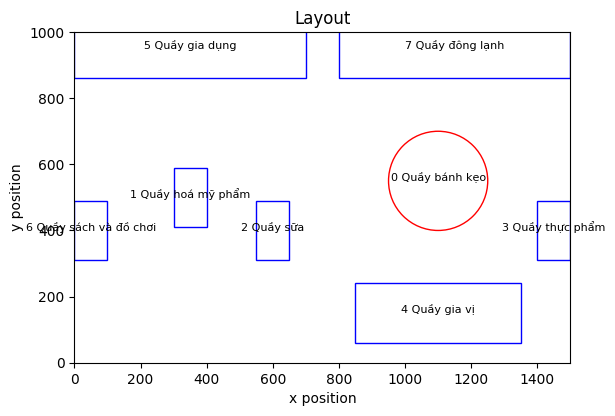

In [38]:
import matplotlib.patches as patches
fig, ax = plt.subplots()

for index, row in df_shelf.iterrows():
    x = row['location_x_(center)']
    y = row['location_y_(center)']
    width = row['width']
    height = row['height']
    if row['shape'] == 'Kệ hàng':  
        rect = patches.Rectangle((x - width/2, y - height/2), width, height, linewidth=1, edgecolor='blue', facecolor='none')
        ax.add_patch(rect)
    elif row['shape'] == 'Quầy tròn':  
        circle = patches.Circle((x, y), width/2, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(circle)
    ax.text(x, y, str(row['shelf_id']) + ' ' + row['description'], fontsize=8, ha='center')

ax.set_xlim(0,1500)
ax.set_ylim(0,1000)

ax.set_xlabel('x position')
ax.set_ylabel('y position')
ax.set_title('Layout')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [39]:
df_shelf.head()

,shelf_id,description,location_x_(center),location_y_(center),width,height,length,number_of_items,shape
0,0,Quầy bánh kẹo,1100,550,300,180,300,13,Quầy tròn
1,1,Quầy hoá mỹ phẩm,350,500,100,180,400,18,Kệ hàng
2,2,Quầy sữa,600,400,100,180,600,9,Kệ hàng
3,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
4,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng


# 4. ANSWERS:

## Q1
Thống kê ***5 mặt hàng*** có **tổng thời gian nhìn và cầm xem lâu nhất**?

In [40]:
ans1 = df_cust.groupby('si_id')[['looking_at_item_(s)', 'holding_the_item_(s)']].sum().reset_index()
ans1['total_time']=ans1['looking_at_item_(s)']+ans1['holding_the_item_(s)']
ans1=pd.merge(right=ans1,left=df_item, how='right', on='si_id')
ans1[['shelf_id'	,'item_id',	'name','total_time']].sort_values(by='total_time', ascending=False).head(5)

,shelf_id,item_id,name,total_time
130,7,6,Sữa chua uống Yakult,22896
131,7,7,Sữa chua uống Probi,22896
39,2,8,Sữa ông thọ,13939
9,0,6,Bim bim Oishi,13866
10,0,7,Snack khoai tây Lays,13362


## Q2
Thống kê ***5 mặt hàng*** thường **được cầm lên rồi trả lại nhiều nhất**?

In [41]:
# picking_up_item & returning_item have no nulls 
ans2=df_cust[['si_id','picking_up_item','returning_item']]
ans2=ans2[(ans2['picking_up_item']==True) & (ans2['returning_item']==True)].groupby('si_id').count().sort_values(by='picking_up_item',ascending=False).reset_index()
ans2=pd.merge(right=ans2, left=df_item[['name', 'si_id']], how='right', on='si_id' )
ans2=ans2.drop(columns=['picking_up_item'])
ans2.head(5)

,name,si_id,returning_item
0,4 hộp sữa lúa mạch Milo 180ml,22,134
1,Snack khoai tây Lays,07,127
2,Mý ý SG Food,712,117
3,Nước lẩu Barona,714,116
4,Sữa chua Vinamik,72,114


## Q8
Top 3 quầy hàng có thời lượng trung bình quan tâm đến sản phẩm, trên số lượt tương tác, là lâu nhất (quan tâm tương ứng với việc **nhìn và cầm xem**)?

In [42]:
si_total_ii_time = df_cust.groupby(['shelf_id'])[['holding_the_item_(s)','looking_at_item_(s)']].sum().reset_index()
si_total_ii_count= i_i.groupby(['shelf_id'])[['holding_the_item_(s)','looking_at_item_(s)']].sum().reset_index()
ans=pd.merge(left=si_total_ii_time, right=si_total_ii_count, how='left', on='shelf_id')
ans['avg_ii'] = ans['holding_the_item_(s)_x']/ans['holding_the_item_(s)_y'] + ans['looking_at_item_(s)_x']/ans['looking_at_item_(s)_y']
ans=ans[['avg_ii', 'shelf_id']].sort_values(by='avg_ii', ascending=False)
ans=pd.merge(left=ans, right=df_shelf, on='shelf_id', how='left' )
ans[['shelf_id','description', 'avg_ii']].sort_values(by='avg_ii', ascending=False).head(3)

,shelf_id,description,avg_ii
0,5,Quầy gia dụng,62.260184
1,7,Quầy đông lạnh,61.009985
2,3,Quầy thực phẩm,59.845622


## Q10
Người dùng có thói quen di chuyển giữa 2 quầy hàng nào nhiều nhất?

In [43]:
path=i_i[['person_id', 'shelf_id','date']].drop_duplicates().reset_index(drop=True)

In [44]:
ans = path.groupby(['person_id', 'date'])['shelf_id'].apply(list).reset_index()
def create_pairwise_path(shelf_ids):
    pairs = []
    if len(shelf_ids) ==1:
        pairs.append((shelf_ids[0],None))
    else:
        for i in range(len(shelf_ids) - 1):
            pairs.append((shelf_ids[i],shelf_ids[i + 1]))
         
    return pairs

ans['path'] = ans['shelf_id'].apply(create_pairwise_path)
ans.drop(columns='shelf_id', inplace=True)

In [45]:
all_paths = [path for sublist in ans['path'] for path in sublist]
from collections import Counter
path_counts = Counter(all_paths)
most_common_path, most_common_count = path_counts.most_common(1)[0]
ans10=(most_common_path, most_common_count)
ans10


((7, 0), 97)

## Q5
Trong 3 nhóm tuổi sau: Thiếu niên (18 - 30), Trung niên (31 - 60), Cao tuổi: (> 60), nhóm tuổi nào có **số người đi siêu thị nhiều nhất?**

In [46]:
shopper_freq=df_cust[['person_id','age', 'date']]

bins = [18, 31, 61, shopper_freq['age'].max() + 1]
labels = [1, 2, 3]

shopper_freq['age_group'] = pd.cut(shopper_freq.age, bins=bins, labels=labels, right=False)
shopper_freq=shopper_freq.drop(columns=['age'])
ans5=shopper_freq.groupby('age_group').count().reset_index(drop=True)
ans5

/tmp/ipykernel_5304/1804420242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shopper_freq['age_group'] = pd.cut(shopper_freq.age, bins=bins, labels=labels, right=False)
/tmp/ipykernel_5304/1804420242.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ans5=shopper_freq.groupby('age_group').count().reset_index(drop=True)


,person_id,date
0,3574,3574
1,7617,7617
2,4203,4203


## Q3
Các nhóm khách hàng theo độ tuổi (Thiếu niên: 18 - 30; Trung niên: 31 - 60; Cao tuổi: > 60) **mua** mặt hàng nào nhiều nhất?

In [47]:
shopper_buy=pd.merge(left=demo[['age_group', 'si_id', 'person_id','timestamp']], right=i_i[['si_id', 'person_id', 'timestamp','is_buy']], how='inner', on=['si_id', 'person_id', 'timestamp'])
shopper_buy=pd.merge(left=shopper_buy.groupby(['age_group','si_id'])['is_buy'].sum().reset_index(), right=df_item, how='right', on='si_id')
shopper_buy=shopper_buy[['si_id','age_group', 'is_buy','name']].sort_values(by='is_buy',ascending=False).reset_index(drop=True)
ans3=shopper_buy.drop_duplicates(subset=['age_group'],keep='first').sort_values(by='age_group',ascending=True)
ans3

/tmp/ipykernel_5304/707363991.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopper_buy=pd.merge(left=shopper_buy.groupby(['age_group','si_id'])['is_buy'].sum().reset_index(), right=df_item, how='right', on='si_id')


,si_id,age_group,is_buy,name
10,04,1,41,Bánh trứng Custard
0,70,2,86,Kem tràng tiền
4,04,3,50,Bánh trứng Custard


## Q6
Top 5 các mặt hàng giảm giá được người dùng **mua** nhiều nhất?

In [48]:
ans6=pd.merge(left=i_i.groupby('si_id')['is_buy'].sum().sort_values(ascending=False), right=df_item, how='left',on='si_id').sort_values(by='is_buy', ascending=False)
ans6[ans6['discount'] > 0].sort_values(by='is_buy',ascending=False)[['name','si_id', 'is_buy','discount']].set_index('si_id').head(5)

,name,is_buy,discount
si_id,,,
04,Bánh trứng Custard,159,10
70,Kem tràng tiền,154,5
27,Sữa bột Milo,154,15
11,Dầu gội Romano,95,25
111,Khăn mặt Shine,90,20


## Q7
Top 5 các mặt hàng được chạy quảng cáo được người dùng **mua** nhiều nhất?

In [49]:
ans7=pd.merge(left=i_i.groupby('si_id')['is_buy'].sum().sort_values(ascending=False), right=df_item, how='left',on='si_id').sort_values(by='is_buy', ascending=False)
ans7[ans7['marketing_strategy'] == True].sort_values(by='is_buy',ascending=False)[['name','si_id', 'is_buy','marketing_strategy']].set_index('si_id').head(5)

,name,is_buy,marketing_strategy
si_id,,,
04,Bánh trứng Custard,159,True
70,Kem tràng tiền,154,True
27,Sữa bột Milo,154,True
111,Khăn mặt Shine,90,True
110,Khăn tắm Shine,87,True


## Q4 
Ngày nào trong tuần có doanh thu cao nhất?


In [50]:
ans4=pd.merge(left=i_i[['dow', 'si_id', 'is_buy']], right=df_item[['si_id', 'name', 'price_vnd']], how='right', on='si_id')
ans4[ans4['is_buy']==True].groupby('dow')['price_vnd'].sum().sort_values(ascending=False)

dow
Saturday     174194600
Sunday       170302700
Thursday      52373300
Tuesday       49464400
Friday        46332200
Wednesday     38032000
Monday        37186000
Name: price_vnd, dtype: int64

## Q9
Top 3 quầy hàng có số sản phẩm được **mua** nhiều nhất?


In [51]:
ans9=pd.merge(left=i_i[['shelf_id','is_buy']], right=df_shelf[['shelf_id', 'description', 'number_of_items']], how='left', on='shelf_id')
ans9[ans9['is_buy']==True].groupby(['shelf_id', 'description', 'number_of_items']).count().reset_index().sort_values(by='is_buy',ascending=False).head(3)

,shelf_id,description,number_of_items,is_buy
1,1,Quầy hoá mỹ phẩm,18,840
7,7,Quầy đông lạnh,16,675
0,0,Quầy bánh kẹo,13,586


# 5. Combined df for Q11 & Q12




In [71]:
item_shelf=pd.merge(left=df_item, right=df_shelf, how='left', on='shelf_id')
df = pd.merge(left=df_cust, right=item_shelf, how='left', on=['shelf_id','item_id','si_id'])

In [84]:
df_col = df.columns.to_list()
df_col_new = {col: re.sub(r'[()]', '', col.strip()).lower() for col in df_col}
df.rename(columns=df_col_new, inplace=True)

In [87]:
df.dropna()

,shelf_id,person_id,timestamp,age,gender,height_x,weight,married_status,moving_speed_m/s,item_id,...,discount,rate,description,location_x_center,location_y_center,width,height_y,length,number_of_items,shape
0,4,1,2024-07-06 10:00:00,52,Female,162,41,Married,0.19,16,...,10,3,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
1,4,1,2024-07-06 10:02:00,52,Female,162,41,Married,0.49,5,...,5,4,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
2,4,1,2024-07-06 10:05:00,52,Female,162,41,Married,0.36,4,...,10,5,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
3,4,1,2024-07-06 10:06:00,52,Female,162,41,Married,0.64,8,...,5,3,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
4,4,1,2024-07-06 10:08:00,52,Female,162,41,Married,0.13,6,...,0,3,Quầy gia vị,1100,150,500,180,100,19,Kệ hàng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15389,2,1500,2024-07-05 03:49:00,52,Female,154,44,Single,0.52,4,...,10,5,Quầy sữa,600,400,100,180,600,9,Kệ hàng
15390,3,1500,2024-07-05 03:54:00,52,Female,154,44,Single,0.85,3,...,0,5,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
15391,3,1500,2024-07-05 03:56:00,52,Female,154,44,Single,0.76,21,...,10,3,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng
15392,3,1500,2024-07-05 03:58:00,52,Female,154,44,Single,1.41,13,...,0,5,Quầy thực phẩm,1450,400,100,180,600,25,Kệ hàng


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15394 entries, 0 to 15393
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   shelf_id                               15394 non-null  int64         
 1   person_id                              15394 non-null  int64         
 2   timestamp                              15394 non-null  datetime64[ns]
 3   age                                    15394 non-null  int64         
 4   gender                                 15394 non-null  object        
 5   height_x                               15394 non-null  int64         
 6   weight                                 15394 non-null  int64         
 7   married_status                         15394 non-null  object        
 8   moving_speed_m/s                       15394 non-null  float64       
 9   item_id                                15394 non-null  int64 